# **2. EDA and Feature Engineering**

## *Table of Contents*

1. [Data Cleaning](./02_Data_Cleaning.ipynb)
2. [**EDA and Feature Engineering**](./03_Exploratory_Data_Analysis.ipynb)
   1. [*Library Imports*](#Library-Imports)
   2. [*File Importation*](#File-Importation)
   3. [*Analysis*](#Analysis)
      1. [Descriptive Statistics](#Descriptive-Statistics)
      2. [Histogram Plots](#Histogram-Plots)
      3. [Skewness Check](#Skewness-Check)
      4. [Q-Q Plots](#Q-Q-Plots)
      5. [Box Plots](#Box-Plots)
      6. [Count Plots](#Count-Plots)
      7. [Pair Plot](#Pair-Plot)
      8. [Correlation Matrix](#Correlation-Matrix)
      9. [Chi-Square Test](#Chi-Square-Test)
3. [Regression Modeling](./04_Regression_Modeling.ipynb)
4. [Time_Series](./05_Time_Series.ipynb)

## **Library Imports**

### Standard library imports

In [1]:
import sys # Provides a way of using operating system dependent functionality
import os  # For interacting with the operating system
from itertools import combinations  # For creating combinations of elements

### Third-party imports

In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For scientific computing and array objects
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For data visualization based on matplotlib
from scipy import stats  # For scientific and technical computing
from sklearn.preprocessing import MinMaxScaler  # For feature scaling
from scipy.stats import chi2_contingency  # For performing chi-square contingency tests

### Local application imports

In [3]:
# Define the absolute path of the parent directory of the script's grandparent directory
# This is useful for module importation from a different directory structure
parent_dir = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.insert(0, parent_dir)

# Local application imports
from utils import plot_utils, func_utils

## **File Importation**

In [4]:
# Determine the absolute path to the directory containing the current script
script_dir = os.path.dirname(os.path.dirname(os.getcwd()))

# Construct the path to the data file
data_path = os.path.join(script_dir, '01_Data_Cleaning', '1_cleaned_melb_data.csv')

# Load dataset containing cleaned Melbourne housing data
melb_data = pd.read_csv(data_path)

## **Analysis**

In [5]:
# Define quantitative and categorical columns for subsequent analysis
quan_columns = ['Price', 'Bedroom', 'Bathroom', 'Car', 'Distance', 'Landsize', 'BuildingArea']
cat_columns = ['Postcode', 'Suburb', 'Regionname', 'CouncilArea', 'Type', 'SellerG', 'Method', 'Year', 'Month']

### Descriptive Statistics

In [6]:
# Display descriptive statistics to summarize central tendency, dispersion, and shape
print(melb_data.describe())

           Postcode         Price          Year         Month       Bedroom  \
count  12622.000000  1.262200e+04  12622.000000  12622.000000  12622.000000   
mean    3103.112819  9.718174e+05   2016.533513      7.036920      2.819759   
std       89.646530  4.480099e+05      0.498895      2.530705      0.892572   
min     3000.000000  8.500000e+04   2016.000000      1.000000      1.000000   
25%     3044.000000  6.320000e+05   2016.000000      5.000000      2.000000   
50%     3081.000000  8.720000e+05   2017.000000      7.000000      3.000000   
75%     3147.000000  1.253375e+06   2017.000000      9.000000      3.000000   
max     3977.000000  2.350000e+06   2017.000000     12.000000     10.000000   

           Bathroom           Car      Distance      Landsize  \
count  12622.000000  12622.000000  12622.000000  12622.000000   
mean       1.466012      1.566234     10.141705    357.796308   
std        0.606525      0.931967      5.828159    293.242358   
min        1.000000      0.0

### Histogram Plots

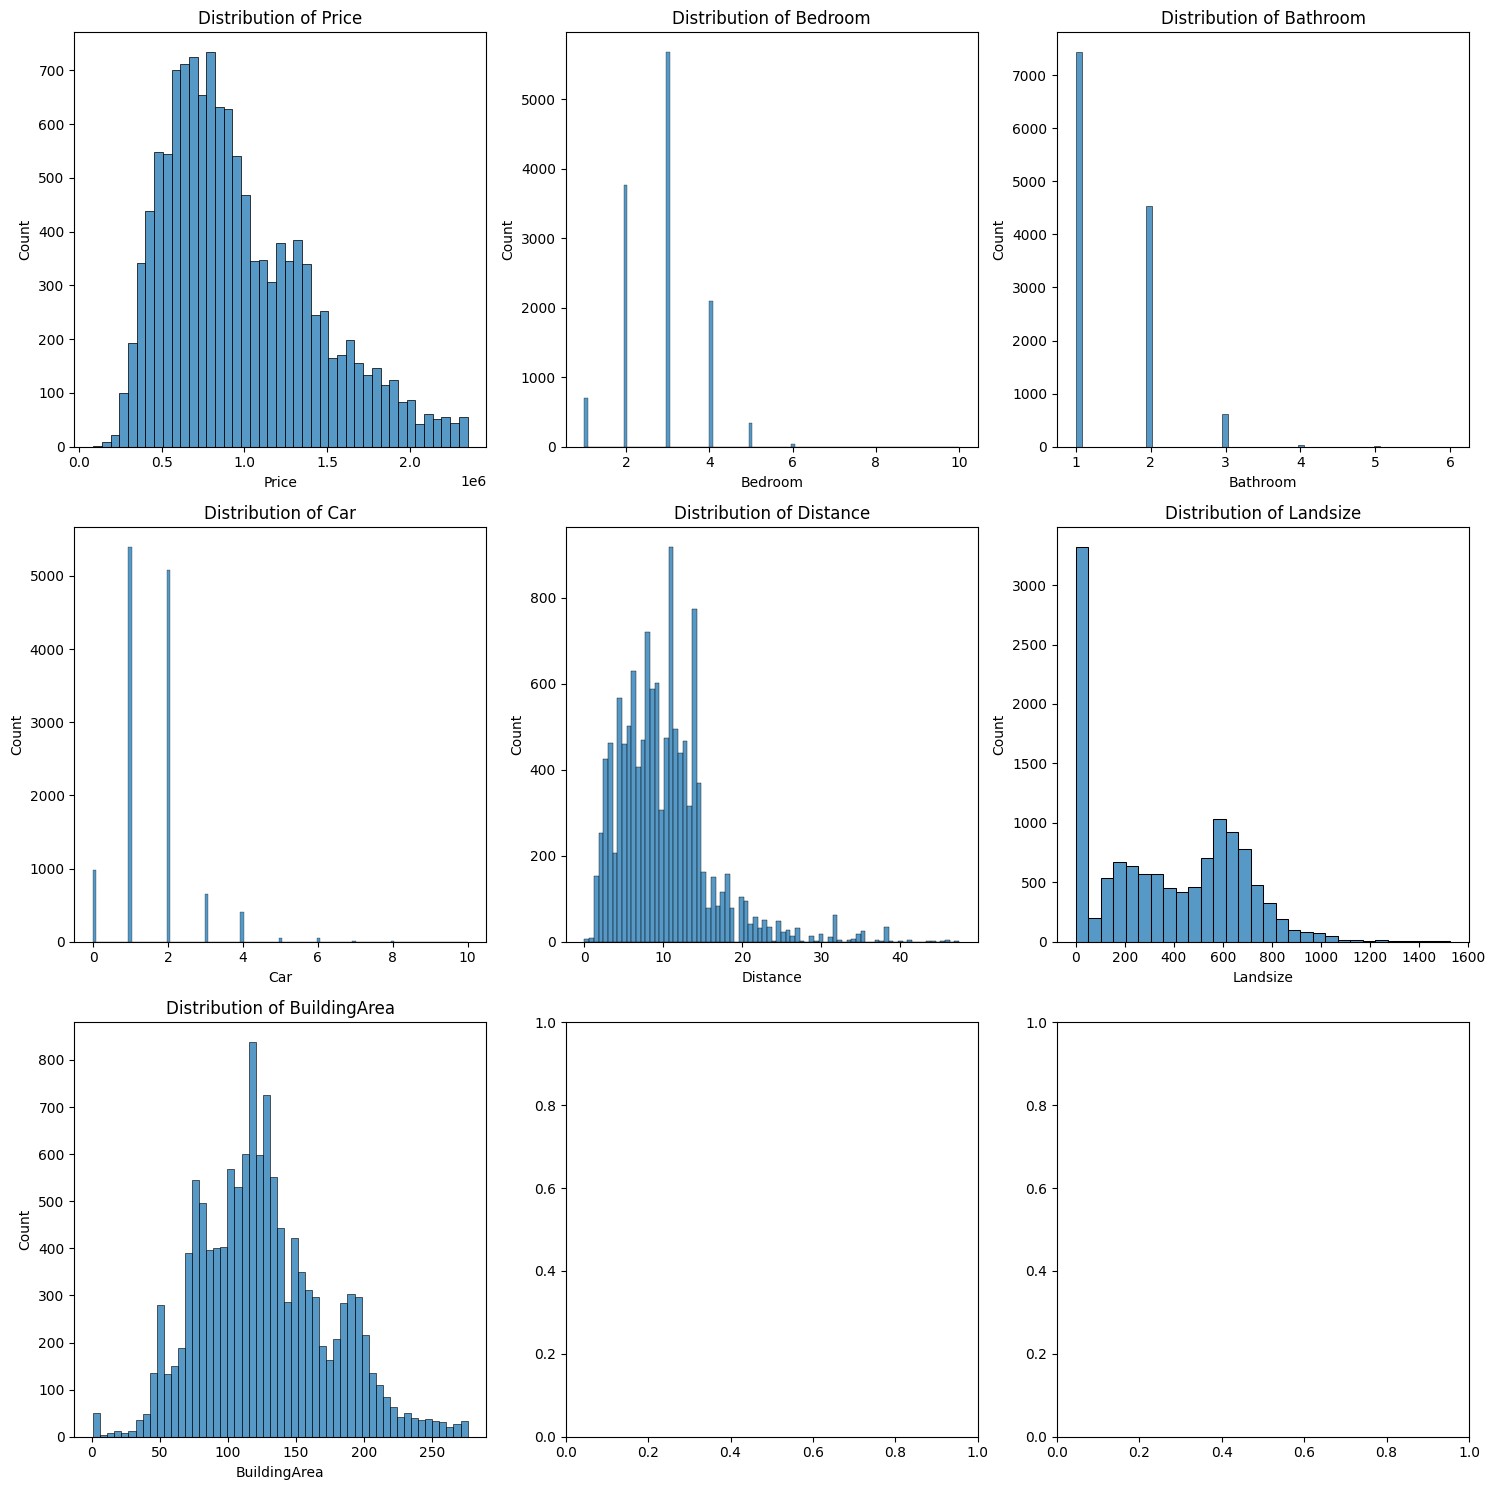

In [7]:
# Plot histograms for quantitative columns in 'melb_data' across a 3x3 grid.
plot_utils.plot_hist(data=melb_data, column_list=quan_columns, rows=3, cols=3)

### Skewness Check

In [8]:
# Assess skewness of quantitative variables
print(melb_data[quan_columns].skew())

Price           0.806352
Bedroom         0.269002
Bathroom        1.077447
Car             1.341999
Distance        1.575452
Landsize        0.277247
BuildingArea    0.436870
dtype: float64


### Q-Q Plots

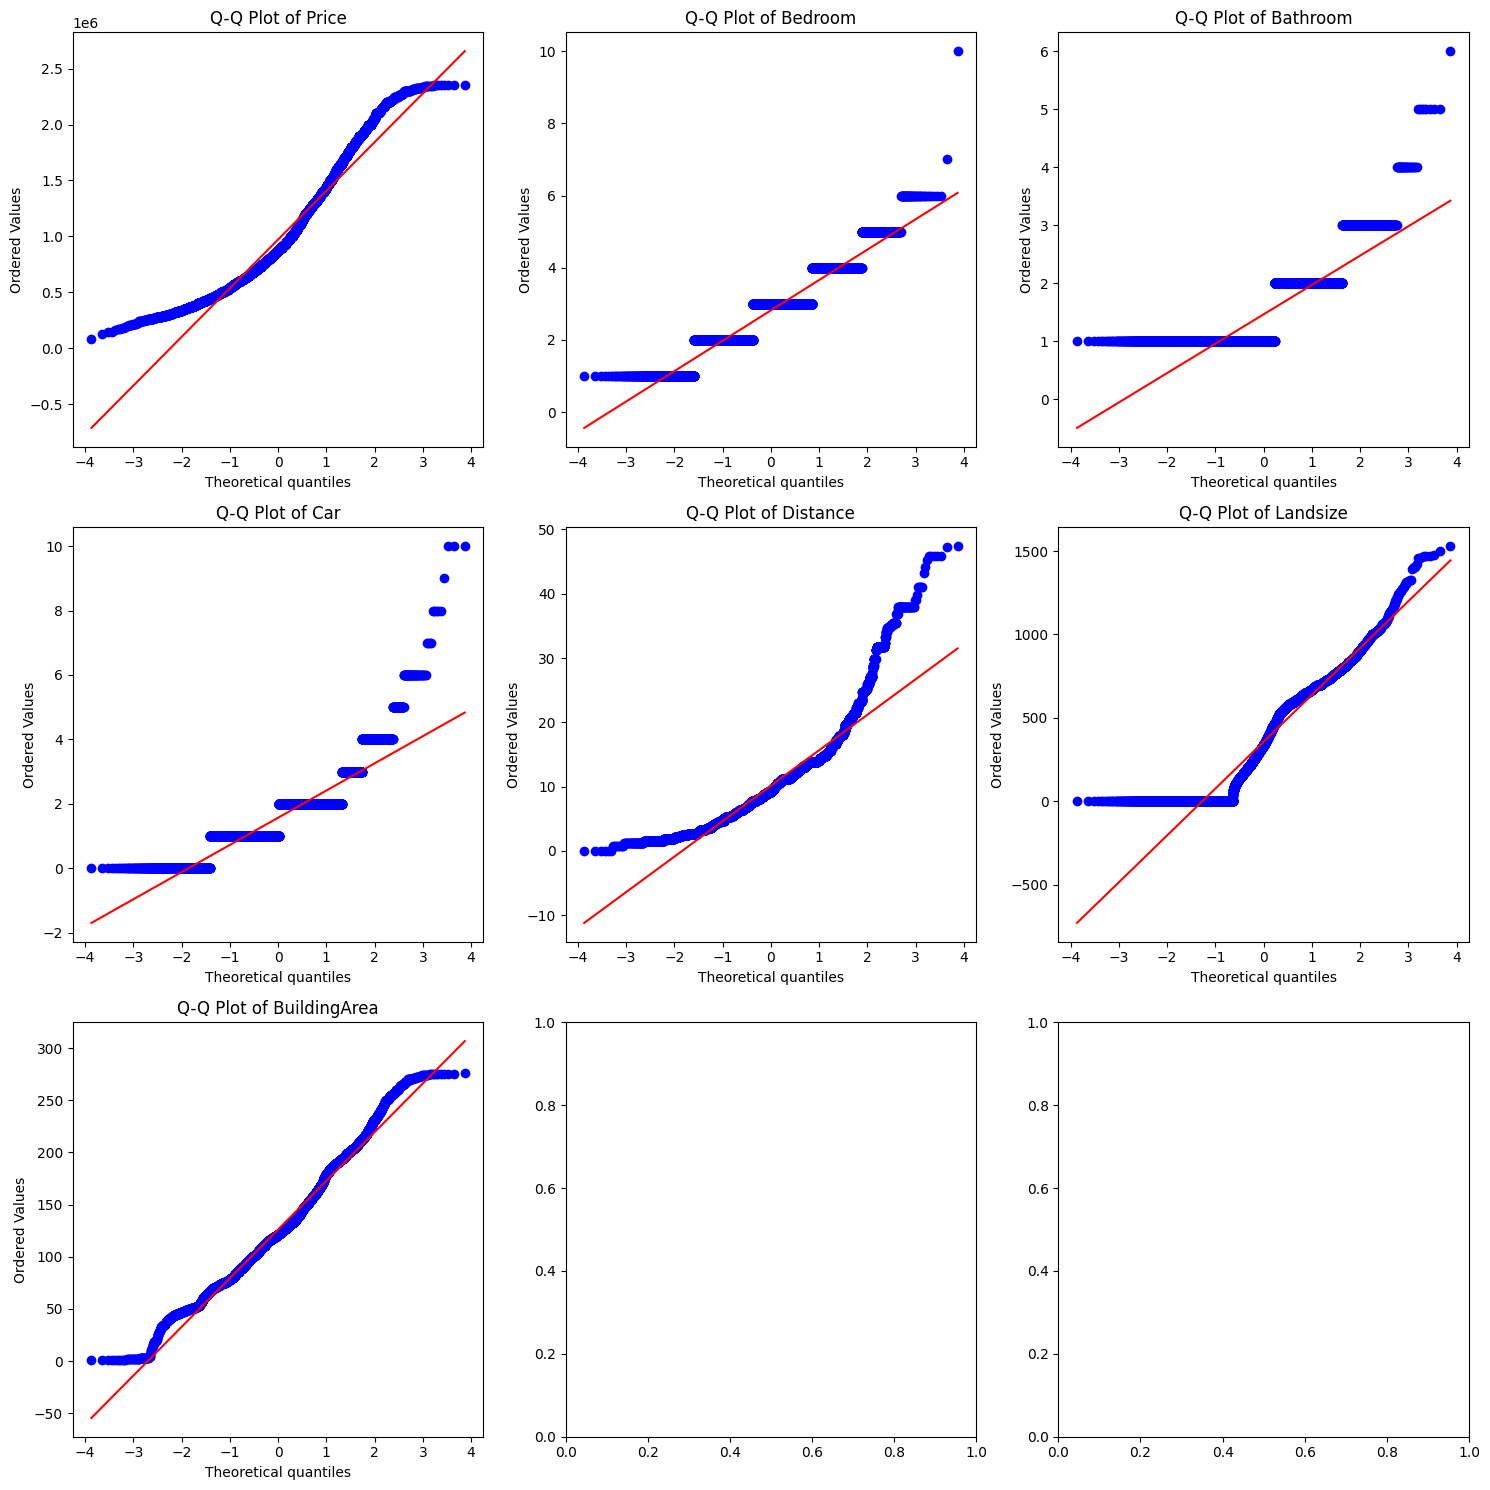

In [9]:
# Generate Q-Q plots for quantitative columns in 'melb_data' on a 3x3 grid.
plot_utils.plot_qq(data=melb_data, column_list=quan_columns, rows=3, cols=3)

### Box Plots

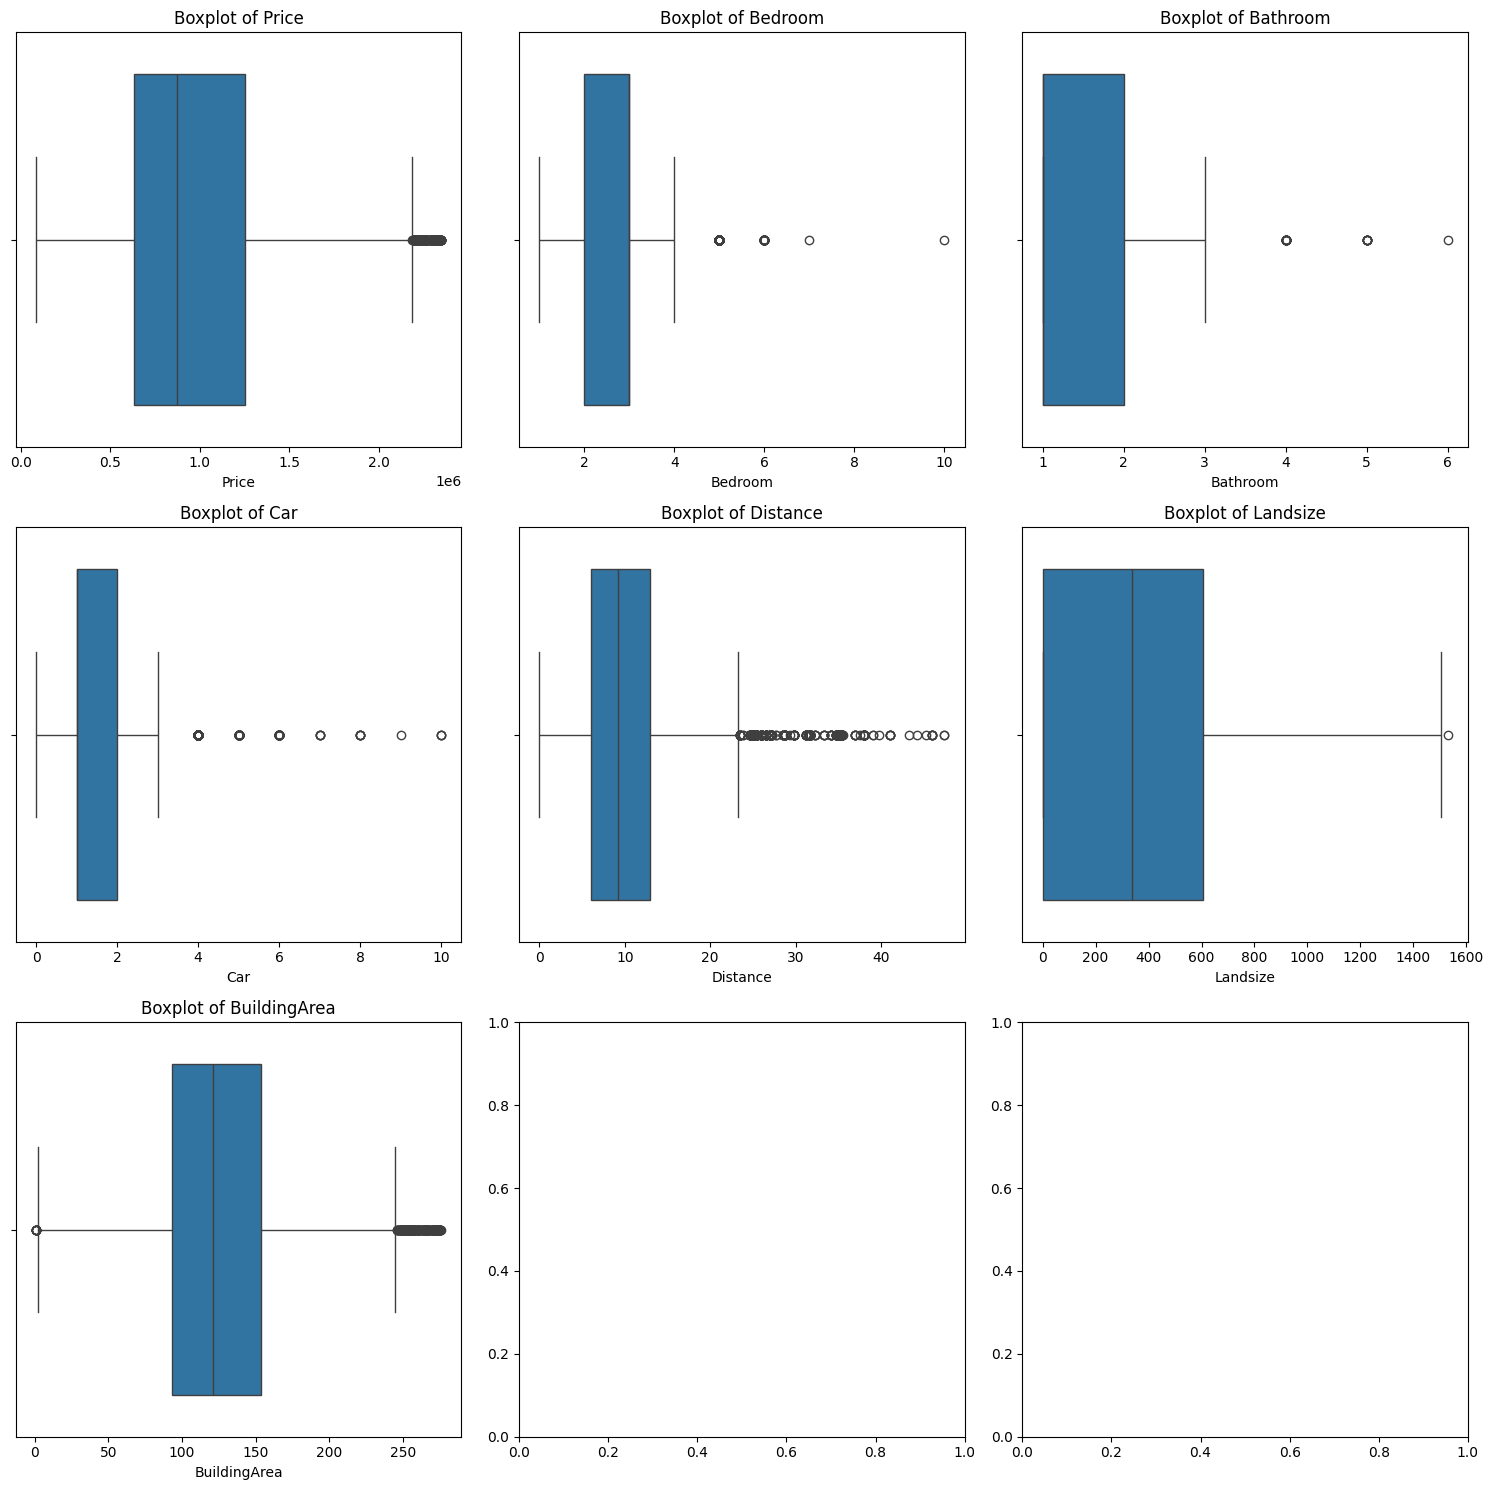

In [10]:
# Create box plots for quantitative columns in 'melb_data' arranged in a 3x3 grid.
plot_utils.plot_box(data=melb_data, column_list=quan_columns, rows=3, cols=3)

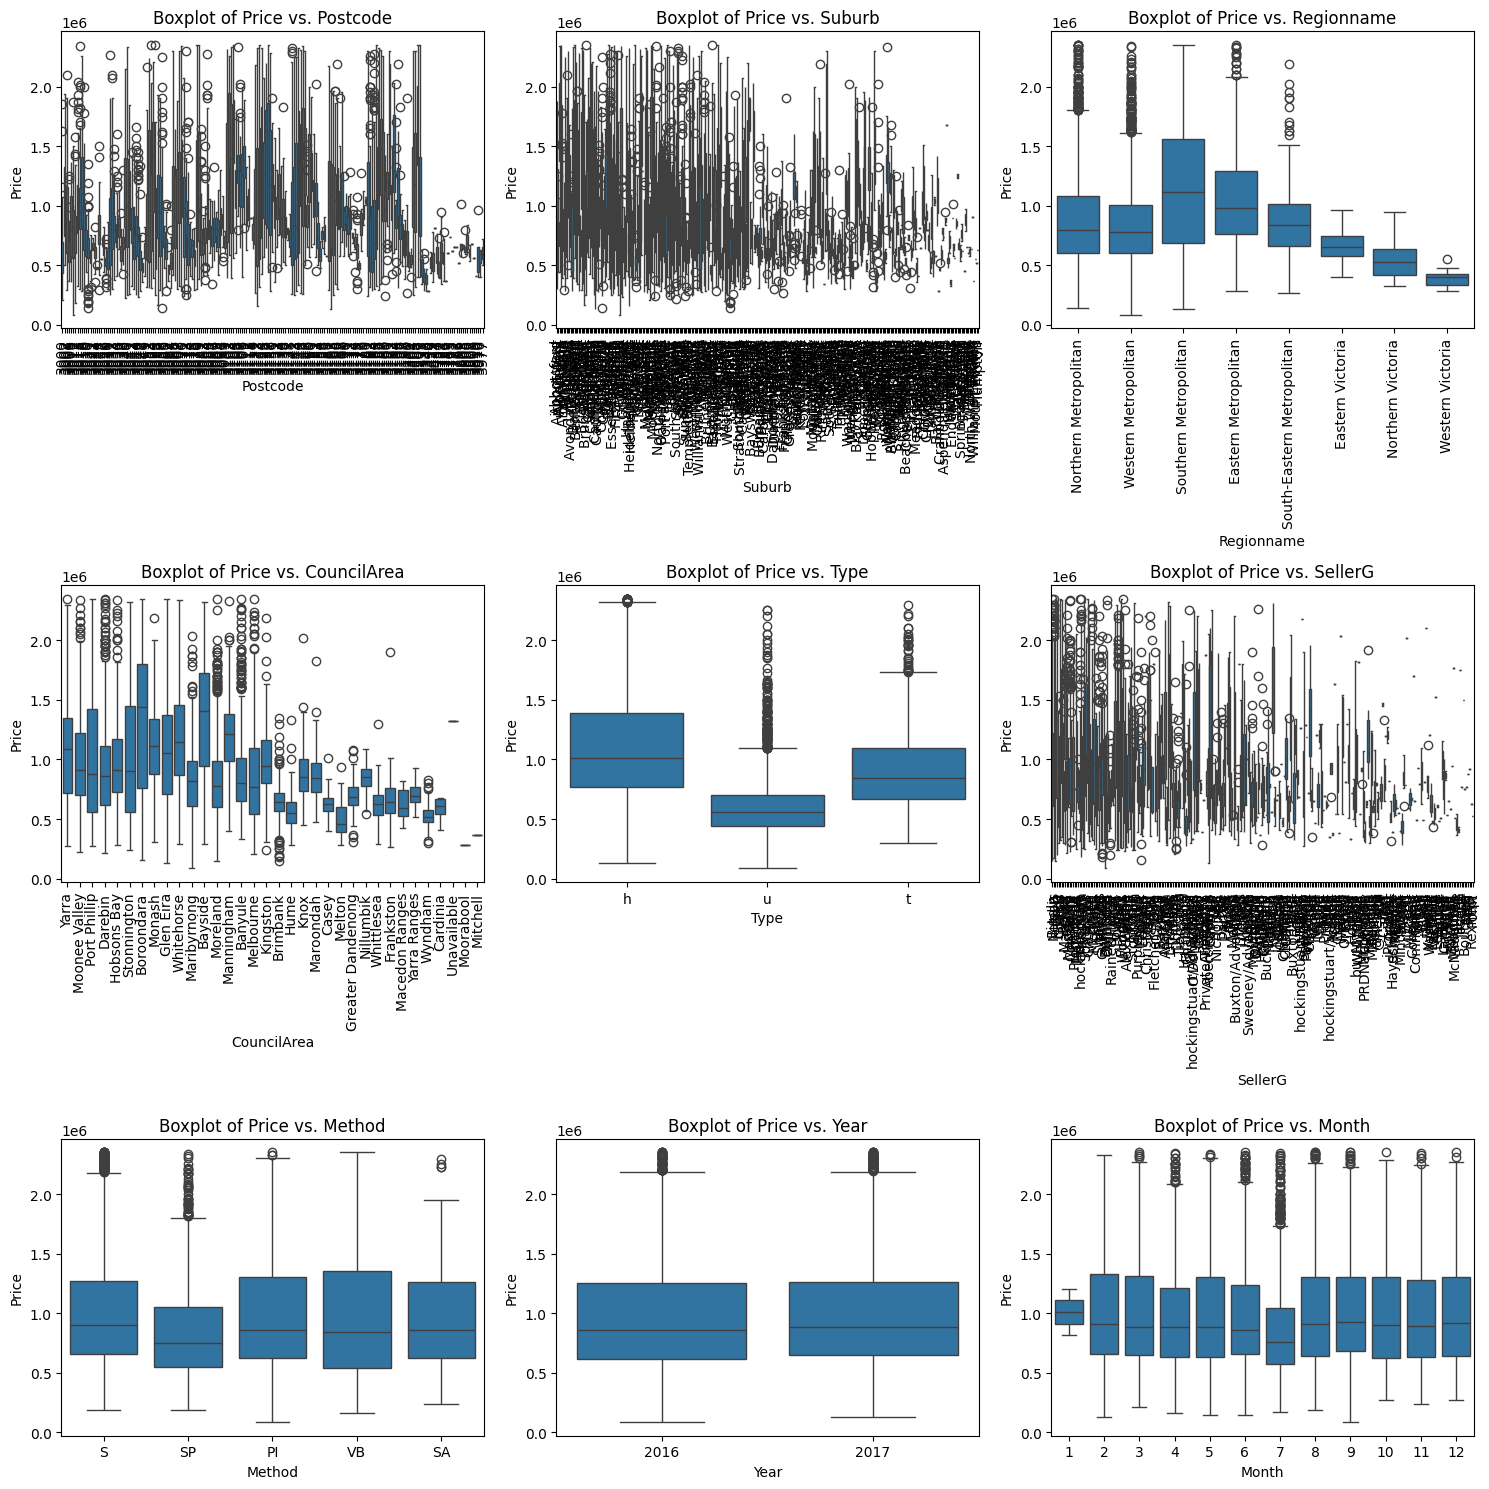

In [11]:
# Plot box plots for categorical columns in 'melb_data' with price consideration over a 3x3 grid.
plot_utils.plot_box(data=melb_data, column_list=cat_columns, price=True, rows=3, cols=3)

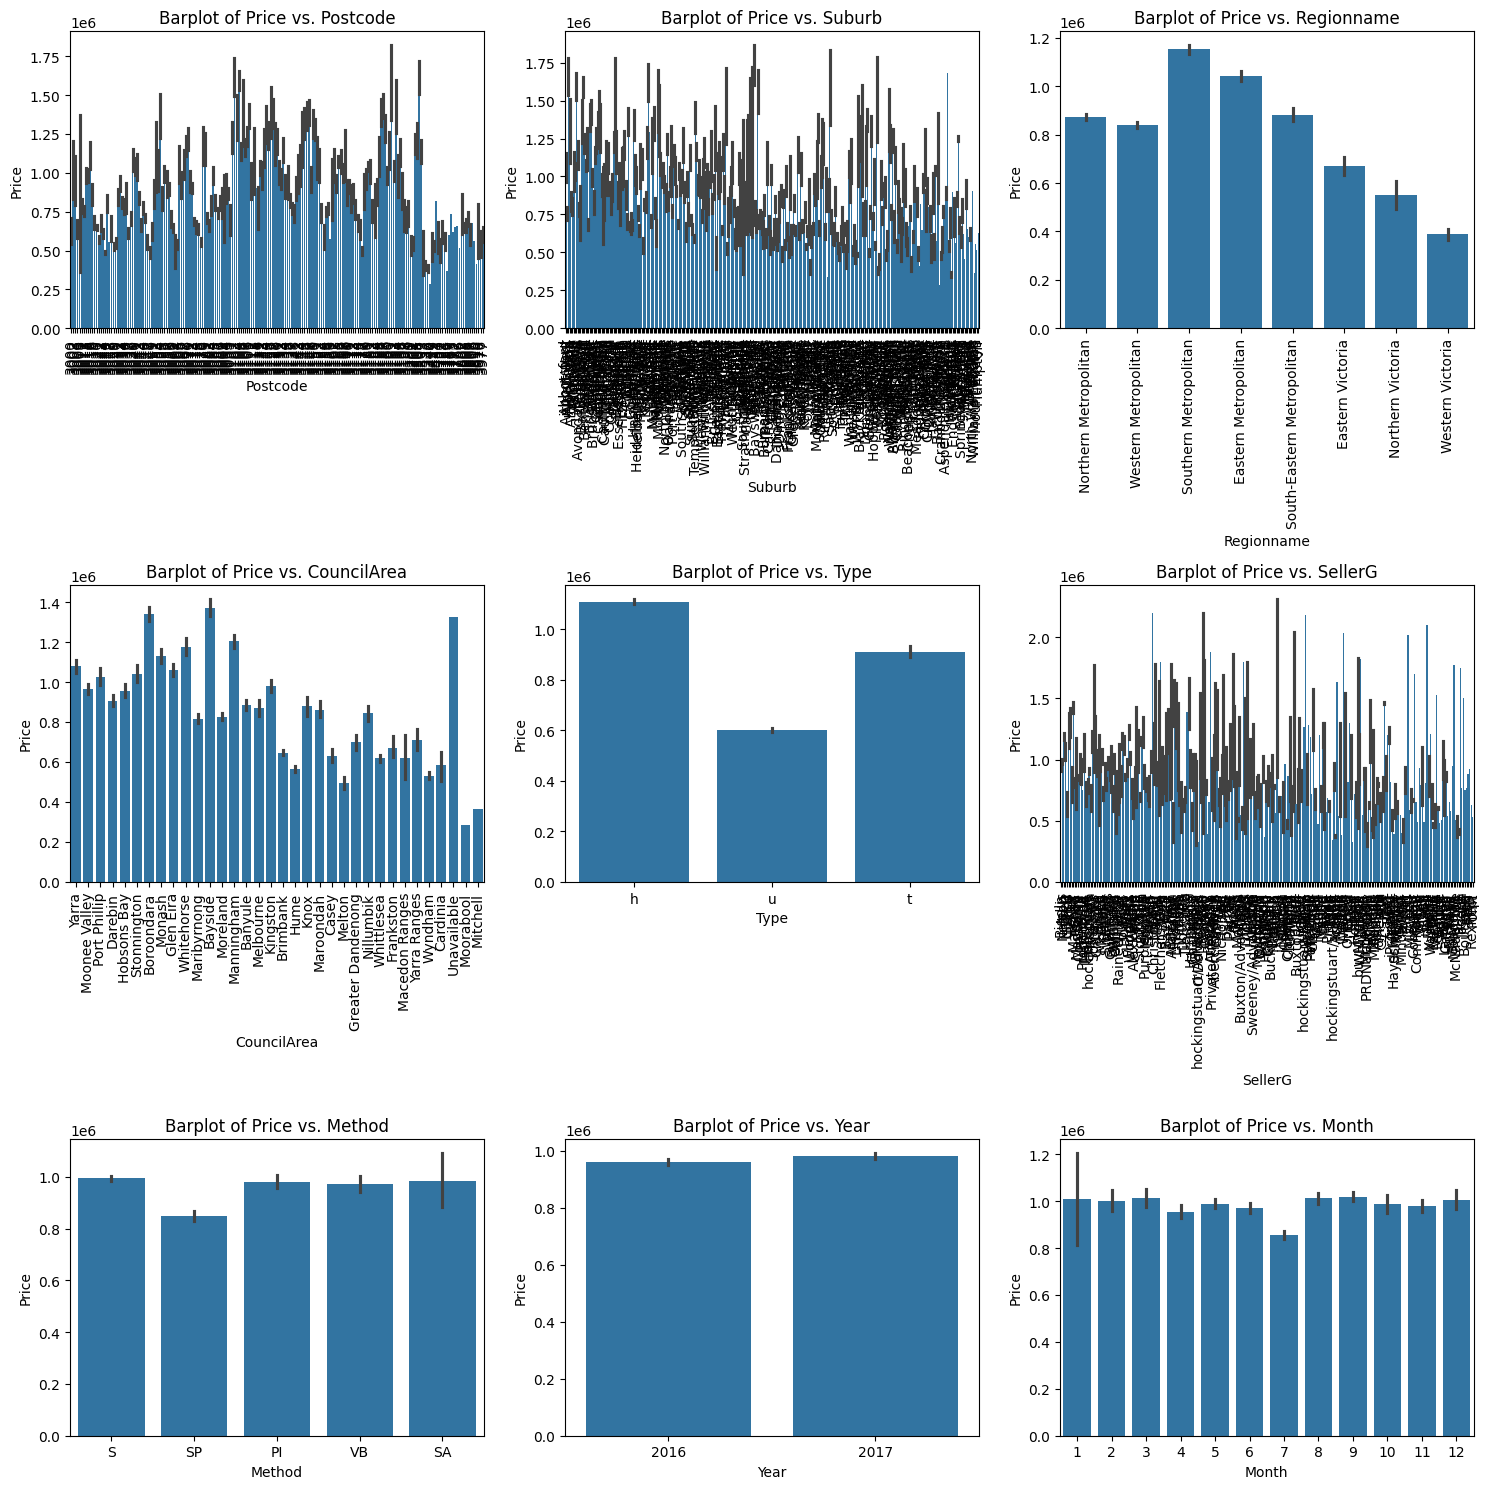

In [12]:
# Display bar plots for categorical columns in 'melb_data' configured in a 3x3 grid layout.
plot_utils.plot_bar(data=melb_data, column_list=cat_columns, rows=3, cols=3)

### Count Plots

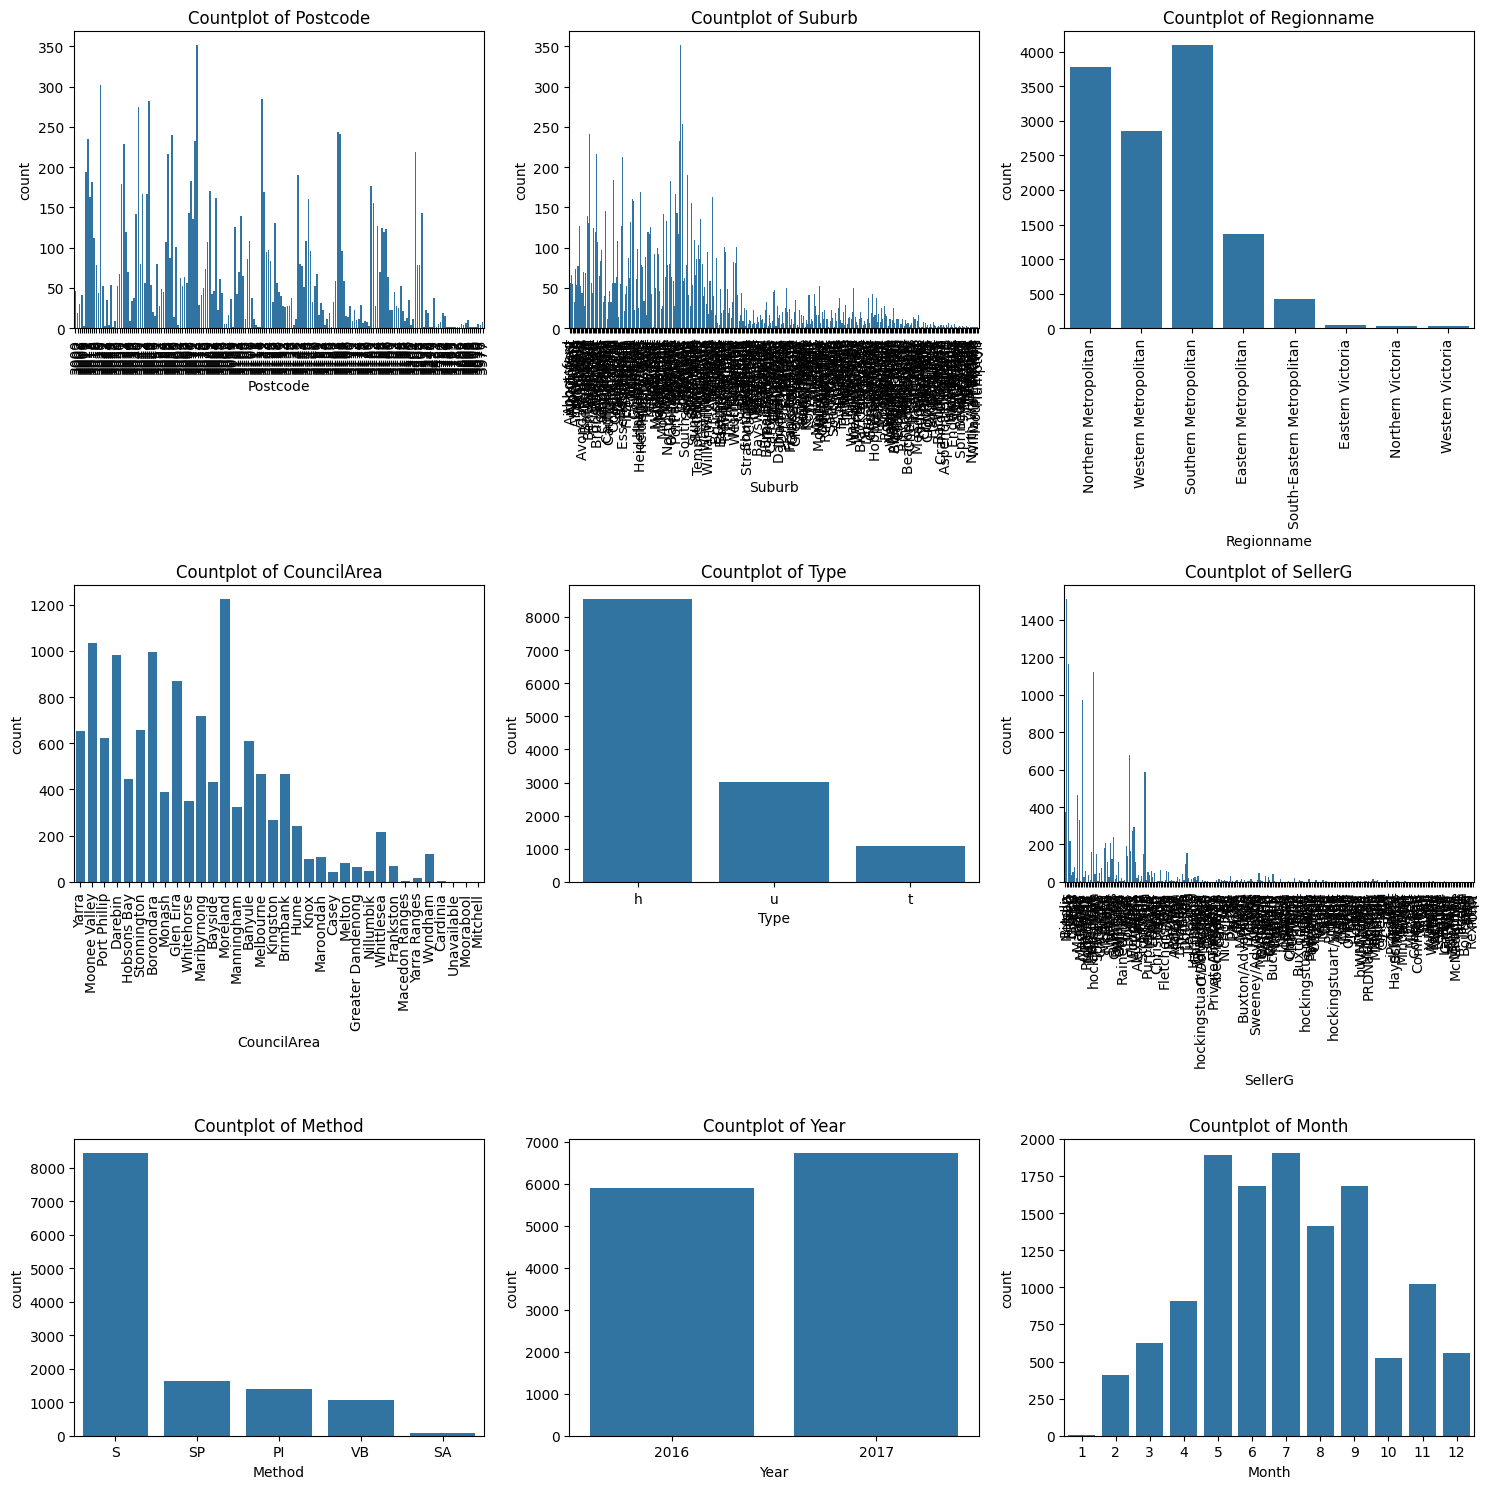

In [13]:
# Plot count plots for categorical columns in 'melb_data', structured within a 3x3 grid.
plot_utils.plot_count(data=melb_data, column_list=cat_columns, rows=3, cols=3)

### Pair Plot

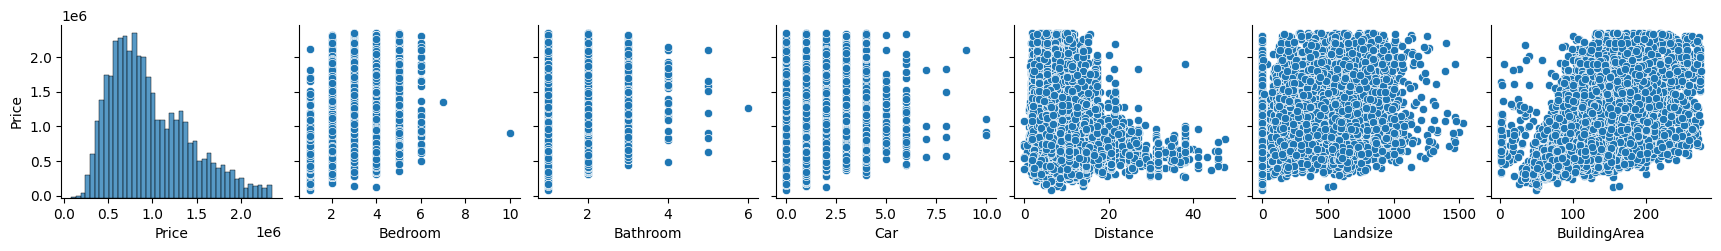

In [18]:
# Visualize pair-wise relationships to identify potential correlations and trends
sns.pairplot(data=melb_data[quan_columns], y_vars='Price')
plt.show()  # Display the pairplot

### Correlation Matrix

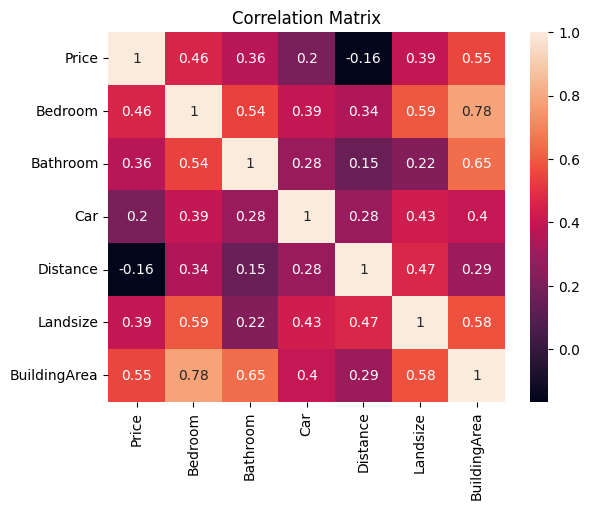

In [15]:
# Display correlation matrix to assess linear relationships between variables
correlation_matrix = melb_data[quan_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

### Chi-Square Test

In [16]:
# List of combinations of categorical columns taken two at a time
cat_comb = list(combinations(cat_columns, 2))

for pair in cat_comb:
    # Create a contingency table for the current pair of categorical columns
    table = pd.crosstab(melb_data[pair[0]], melb_data[pair[1]])

    # Perform the chi-square test on the contingency table
    chi2_stat, p_value, dof, expected = chi2_contingency(table)

    # Print the pair, Chi-square statistic, and p-value
    print(f"Pair: {pair}, Chi2 Statistic: {chi2_stat}, p-value: {p_value}")

Pair: ('Postcode', 'Suburb'), Chi2 Statistic: 2448668.0, p-value: 0.0
Pair: ('Postcode', 'Regionname'), Chi2 Statistic: 81597.57246973139, p-value: 0.0
Pair: ('Postcode', 'CouncilArea'), Chi2 Statistic: 378912.0807830886, p-value: 0.0
Pair: ('Postcode', 'Type'), Chi2 Statistic: 3101.34691972908, p-value: 0.0
Pair: ('Postcode', 'SellerG'), Chi2 Statistic: 245292.63509262883, p-value: 0.0
Pair: ('Postcode', 'Method'), Chi2 Statistic: 1593.1786835012065, p-value: 1.1119090140820206e-58
Pair: ('Postcode', 'Year'), Chi2 Statistic: 2071.941016123746, p-value: 4.007652131466e-311
Pair: ('Postcode', 'Month'), Chi2 Statistic: 3614.259087453267, p-value: 9.250890614261308e-80
Pair: ('Suburb', 'Regionname'), Chi2 Statistic: 88354.0, p-value: 0.0
Pair: ('Suburb', 'CouncilArea'), Chi2 Statistic: 392910.82431994943, p-value: 0.0
Pair: ('Suburb', 'Type'), Chi2 Statistic: 3472.7920342652146, p-value: 0.0
Pair: ('Suburb', 'SellerG'), Chi2 Statistic: 297582.85011194483, p-value: 0.0
Pair: ('Suburb', 'Me